In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [39]:
### Define Action class
%matplotlib inline
class Actions:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0

    # Choose a random action
    def choose(self):
        return np.random.randn() + self.m

    # Update the action-value estimate
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x


def run_experiment(m1, m2, m3, eps, N):

    actions = [Actions(m1), Actions(m2), Actions(m3)]
    data = np.empty(N)
    x_1 = []
    y_1 = []

    for i in range(N):
        # epsilon greedy
        p = np.random.random()
        x_1.append(p)
        #print(p)
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        y_1.append(x)
        #print(str(p) + "," + str(x))
        actions[j].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    #print(x_1)
    plt.scatter(x_1, y_1)
    plt.xlabel('p')
    plt.ylabel('action value')
    plt.title('p vs action value')
    plt.show()
    
    p1 = np.ones(N)*m1
    p2 = np.ones(N)*m2
    p3 = np.ones(N)*m3
    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(p1)
    plt.plot(p2)
    plt.plot(p3)
    plt.xscale('log')
    plt.xlabel('N - log scale')
    plt.ylabel('Cumulative Average')
    
    plt.title('N vs Cumulative Average')
    plt.legend([p1, p2,p3], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='medium')
    plt.show()

    for a in actions:
        print(a.mean)

    return cumulative_average

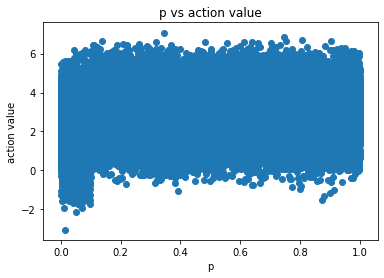

/Users/rdua/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


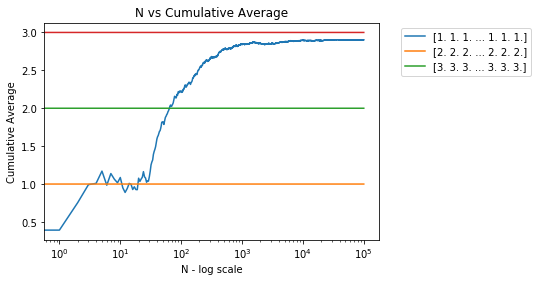

1.0330817147604703
2.0038569954487295
3.000496945883821


In [40]:
c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)

In [ ]:
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)